In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mplt
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Read the dataset

In [30]:
data = pd.read_csv('/content/drive/MyDrive/spam.csv',delimiter=',', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Preprocessing the testing and training dataset

In [31]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1,inplace=True)

In [32]:
from wordcloud import STOPWORDS, ImageColorGenerator, WordCloud

In [33]:

temp1 = data.v2
temp2 = data.v1
LE = LabelEncoder()
temp2 = LE.fit_transform(temp2)
temp2 = temp2.reshape(-1,1)

In [34]:
temp1_train,temp1_test,temp2_train,temp2_test = train_test_split(temp1,temp2,test_size=0.25)

In [35]:
max_words = 1000
max_len = 150
token = Tokenizer(num_words = max_words)
token.fit_on_texts(temp1_train)
sequences = token.texts_to_sequences(temp1_train)
sequences_matrix =  pad_sequences(sequences,maxlen=max_len)

Creating model and adding layers

In [36]:
input_layer = Input(shape=[max_len])
layer = Embedding(max_words,50,input_length=max_len)(input_layer)
layer = LSTM(128)(layer)
layer = Dense(128)(layer)
layer = Activation('relu')(layer)
layer = Dense(1)(layer)
layer = Activation('sigmoid')(layer)
datamodel = Model(inputs=input_layer,outputs=layer)
datamodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 128)               91648     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
 activation_3 (Activation)   (None, 1)                 0   

Compile the model

In [37]:
datamodel.compile(loss='binary_crossentropy',optimizer=Adam(),metrics=['accuracy'])

Train the model

In [38]:
progress = datamodel.fit(sequences_matrix,temp2_train,batch_size=20,epochs=10,validation_split=0.2)

Epoch 1/10
168/168 [==============================] - 30s 169ms/step - loss: 0.1851 - accuracy: 0.9384 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 2/10
168/168 [==============================] - 30s 177ms/step - loss: 0.0402 - accuracy: 0.9883 - val_loss: 0.0422 - val_accuracy: 0.9892
Epoch 3/10
168/168 [==============================] - 28s 166ms/step - loss: 0.0223 - accuracy: 0.9943 - val_loss: 0.0437 - val_accuracy: 0.9880
Epoch 4/10
168/168 [==============================] - 28s 166ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.0467 - val_accuracy: 0.9880
Epoch 5/10
168/168 [==============================] - 28s 167ms/step - loss: 0.0111 - accuracy: 0.9976 - val_loss: 0.0465 - val_accuracy: 0.9892
Epoch 6/10
168/168 [==============================] - 28s 166ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0554 - val_accuracy: 0.9868
Epoch 7/10
168/168 [==============================] - 28s 165ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0614 - val_ac

In [39]:
metrics = pd.DataFrame(progress.history)
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs(var1, var2, string):
    metrics[[var1, var2]].plot()
    mplt.title('Training and Validation ' + string)
    mplt.xlabel ('Number of epochs')
    mplt.ylabel(string)
    mplt.legend([var1, var2])

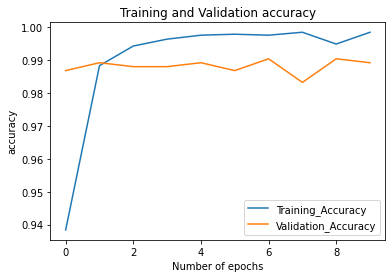

In [40]:
plot_graphs('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

Save the model

In [41]:
datamodel.save('spammodel.h5')

Preprocess the testing data

In [42]:
test_sequences = token.texts_to_sequences(temp1_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

Test the model

In [43]:
result = datamodel.evaluate(test_sequences_matrix,temp2_test)

44/44 [==============================] - 3s 66ms/step - loss: 0.0979 - accuracy: 0.9835


In [44]:
print('Accuracy : {:0.3f}'.format(result[0],result[1]))

Accuracy : 0.098
